# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

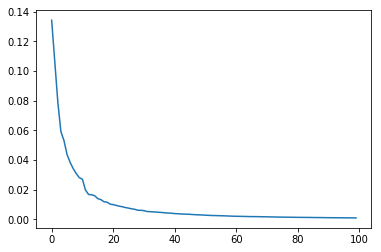

In [11]:
X = []
index = 0
for x in train_labels:
    
    if x == 4:
        X.append(train_data[index])
        
    index = index+1

Conv=np.cov(np.array(X).T)
v = np.linalg.eigvals(Conv)

index = v.argsort()[::-1]
v = v[index]

mean = np.sum(v[0:100])
b = v[0:100]/mean
plt.plot(b)


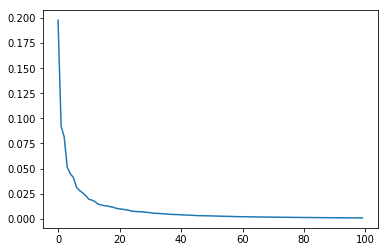

In [7]:
Y = []
index = 0
for x in train_labels:
    if x == 5:
        Y.append(train_data[index])
    index = index+1

Conv=np.cov(np.array(Y).T)
v = np.linalg.eigvals(Conv)

index = v.argsort()[::-1]
v = v[index]

mean = np.sum(v[0:100])
b = v[0:100]/mean
# print(b)
plt.plot(b)

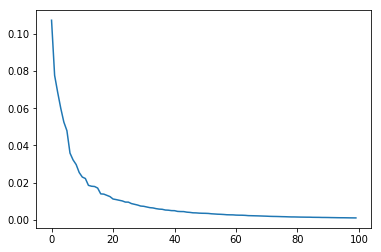

In [8]:
X = train_data
Conv = np.cov(np.array(X).T)
v = np.linalg.eigvals(Conv)

index = v.argsort()[::-1]
v = v[index]



mean = np.sum(v[0:100])
b = v[0:100]/mean
plt.plot(b)

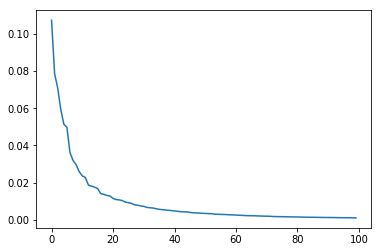

In [9]:
temp = [i for i in range(0,6000)]
X = [train_data[x] for x in np.random.choice(temp,3000)]

Conv = np.cov(np.array(X).T)
v = np.linalg.eigvals(Conv)

index = v.argsort()[::-1]
v = v[index]


mean = np.sum(v[0:100])
b = v[0:100]/mean
plt.plot(b)

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
### Answer 1
#### Part-1
1. The plots of a and b are looking same as most of information of the covariance matrix are stored in the larger eigen values.
2. As a result we see that the graph is in the shape of a hyperbola, but there are minor variations.The eigenvalues of the covariance matrix of 5 have higher values and also has a larger quantity of greater eigen values.

#### Part-2
1. As the eigen spectrum of part c has the eigen values of the entire data, hence the spread of the eigen spectrum is greater than as compared to that in part b.

#### Part-3
1. We can find the approximate rank of each plot by finding the point where the graph almost tends to $0$.
    - $\approx$ 70 for plot a.
    - $\approx$ 80 for plot b.
    - $\approx$ 90 for plot c.
    - $\approx$ 90 for plot d.

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
### Answer-2

#### Part-1
1. If we consider that the pixel can take only binary values {0,1}, then total number of possible images will be $2^{784}$.

#### Part-2
1. Total number of images in MNIST are $7000$.
\begin{equation*}
    Percentage = \frac{7000}{2^{784}}\times 100 \approx 0
\end{equation*}

#### Part-3
1. If we had access to all the data the eigen value spectrum would have been a straight line parralel to x-axis.

---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
The eigen-value spectrum will not change
Proof:

\begin{equation}
    \Sigma = \frac{1}{N} \sum_{i=1}^{N}(x-\mu)(x-\mu)^{T}
\end{equation}

We multiply $x$ with $A$ such that $AA^{T} = I$. Let,

\begin{equation}
    \Sigma^{'} = \frac{1}{N} \sum_{i=1}^{N}(Ax-\mu)(Ax-\mu)^{T}
    {} = \frac{1}{N} \sum_{i=1}^{N}A(x-\mu)(x-\mu)^{T}A^{T}
    {} = A \Sigma A^{T}
\end{equation}

Since $\Sigma^{'}$ and $\Sigma$ are similar therefore the eigen values will be same.

---

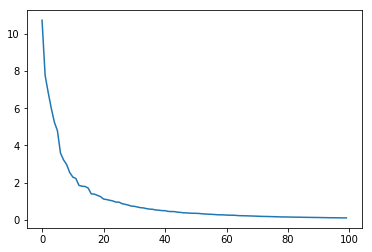

In [60]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here

H = np.random.rand(784,784)
U,S,V = np.linalg.svd(H, full_matrices=False)

X = np.dot(train_data,U)

Conv = np.cov(np.array(X).T)
v = np.linalg.eigvals(Conv)

index = v.argsort()[::-1]
v = v[index]


mean = np.mean(v[0:100])
b = v[0:100]/mean
# print(b)
plt.plot(b)


# print(mat*(mat.T))

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
### Answer-2
#### Part-1


---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

/home/gaurav/Semester_5/SMAI/Assignmnet_1/smai_environment/local/lib/python2.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


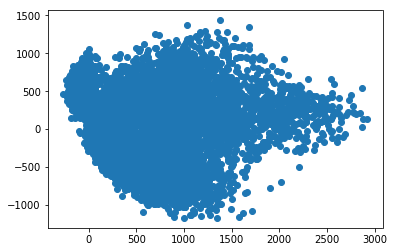

In [3]:
X = train_data
Conv = np.cov(np.array(X).T)
# print(len(Conv))
eig_val,eig_vect = np.linalg.eig(Conv)

index = eig_val.argsort()[-2:][::-1]
eig_val = eig_val[index]
eig_vect = eig_vect[:,index]

# print(eig_vect[:,0])
matrix_w = np.hstack((eig_vect[:,0].reshape(784,1),
                      eig_vect[:,1].reshape(784,1)))


# print(matrix_w)

Y = X.dot(matrix_w)

# plt.plot(Y)
plt.scatter(Y[:,0],Y[:,1])
# plt.plot(eig_vect[:,0])

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [124]:
# Print accuracy on the test set using MLE

def mahala(x,mean,inverse):
#     print(x-mean)
    X = np.array(x-mean)
#     print(X)
#     inverse = np.linalg.pinv(Cov)
    
    d = ((np.dot(np.dot((X),inverse),(X).T)))
    
#     print(d)
    return d
    
#     print(inverse[1][1])


mean_array = []
Cov_array = []
Number = 10

for i in range(Number):
    Y = []
    index = 0
    for x in train_labels:
    #     print(x)
        if x == i:
            Y.append(train_data[index])
        index = index+1
    Y = np.array(Y)    
    mean_array.append(np.mean(Y,axis = 0))
#     C = np.cov(Y.T)
#     print(np.cov(np.transpose(Y)[:,0]))
    Cov_array.append(np.cov(np.transpose(Y)))
    
inverse = []
for i in range(Number):
    inverse.append(np.linalg.pinv(Cov_array[i]))


# print(mean_array)
correct = 0
for j in range(len(test_data)):
    x = test_data[j]
    results = []
#     inverse = np.linalg.pinv(Cov_array[j])
    for i in range(Number):
        results.append(mahala(x,mean_array[i],inverse[i]))
    ans = results.index(min(results))
#     print(results)
#     print(ans)
#     print(test_labels[j])
    if(ans == test_labels[j]):
        correct = correct+1
print(correct)

744


In [9]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

In [143]:
# Print accuracy using Bayesian pairwise majority voting method
mean_array = []
Cov_array = []
Number = 10

for i in range(Number):
    Y = []
    index = 0
    for x in train_labels:
    #     print(x)
        if x == i:
            Y.append(train_data[index])
        index = index+1
    Y = np.array(Y)    
    mean_array.append(np.mean(Y,axis = 0))
#     C = np.cov(Y.T)
#     print(np.cov(np.transpose(Y)[:,0]))
    Cov_array.append(np.cov(np.transpose(Y)))

inverse = []
for i in range(Number):
    for j in range(Number):
        C = Cov_array[i]+Cov_array[j]
        C = C/2
        inverse.append(np.linalg.pinv(C))
        

correct = 0 
for k in range(1000):
    x = test_data[k]
    results = []
    Voting = np.zeros(10)
    for i in range(Number):
        for j in range(Number):
            if i != j:
                d1 = mahala(x,mean_array[i],inverse[10*i+j])
                d2 = mahala(x,mean_array[j],inverse[10*i+j])
                
                if d1 < d2:
                    Voting[i] = Voting[i]+1
                else:
                    Voting[j] = Voting[j]+1
#                 print(d1,d2)
    ans = Voting.argmax()
    
    if ans == test_labels[k]:
        correct = correct + 1

print(correct)

837


In [142]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
mean_array = []
Cov_array = []
Number = 10

for i in range(Number):
    Y = []
    index = 0
    for x in train_labels:
    #     print(x)
        if x == i:
            Y.append(train_data[index])
        index = index+1
    Y = np.array(Y)    
    mean_array.append(np.mean(Y,axis = 0))
#     C = np.cov(Y.T)
#     print(np.cov(np.transpose(Y)[:,0]))
    Cov_array.append(np.cov(np.transpose(Y)))
    
correct = 0
for k in range(len(test_data)):
    x = test_data[k]
    Voting = np.zeros(10)
    
    for i in range(Number):
        for j in range(Number):
            if i != j:
                d1 = np.linalg.norm(x-mean_array[i])
                d2 = np.linalg.norm(x-mean_array[j])
                
                if d1 < d2:
                    Voting[i] = Voting[i]+1
                else:
                    Voting[j] = Voting[j]+1
    ans = Voting.argmax()
    
    if ans == test_labels[k]:
        correct = correct + 1
    
print(correct)


770


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [8]:
def knn(X_train,j,Y_train,k):   
#     v = [(np.linalg.norm(X_train[i]-X_test),Y_train[i]) for i in range(0,6000)]
    v = [(distances[j][i],Y_train[i]) for i in range(0,6000)]
    
    v.sort(key = lambda x: x[0])
        
    z = v[0:k]
        
    Counter = [[0,0,100**100],[1,0,100**100],[2,0,100**100],[3,0,100**100],[4,0,100**100],[5,0,100**100],[6,0,100**100],[7,0,100**100],[8,0,100**100],[9,0,100**100]]
    
    for i in range(0,k):
        label = int(z[i][1])
        value = z[i][0]
        Counter[label][1] = Counter[label][1]+1
        Counter[label][2] = min(Counter[label][2],value)
        
    Counter.sort(key = lambda x: (-x[1],x[2]),reverse = False)
       
    return Counter[0][0]

def compute_distances_no_loops(X_test,X_train):
    dists = -2 * np.dot(X_test, X_train.T) + np.sum(X_train**2,axis=1) + np.sum(X_test**2, axis=1)[:, np.newaxis]
    return dists
    


k_vals = [1,3,5]

X_train = train_data
Y_train = train_labels

X_test = test_data
Y_test = test_labels

distances = compute_distances_no_loops(X_test,X_train)
# print(distances.shape[1])

correct = np.zeros(len(k_vals))

for x in range(len(k_vals)):
    for i in range(0,1000):
#             ans = knn(X_train,X_test[i,:],Y_train,k_vals[x])
            ans = knn(X_train,i,Y_train,k_vals[x])
#             ans = 0
            if Y_test[i] == ans:
                correct[x] = correct[x]+1
            
print(correct/1000)




[0.907 0.919 0.922]


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [10]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [21]:
import copy
def knn(point,X,k):
#     v = [(np.linalg.norm(point-X[i]),i) for i in range(0,6020)]
    v = [(distances[i][point],i) for i in range(0,6020)]
#     print(v)
    v.sort(key = lambda x: x[0])
    
    z = v[0:k]
    for i in range(len(z)):
        c = z[i][1]
        visited[c] = visited[c] + 1
        
def compute_distances_no_loops(X_test,X_train):
    dists = -2 * np.dot(X_test, X_train.T) + np.sum(X_train**2,axis=1) + np.sum(X_test**2, axis=1)[:, np.newaxis]
    return dists


visited = [0]*6020
X_train = train_data
Y_train = train_labels

X_test = test_data
Y_test = test_labels

X = copy.deepcopy(list(X_train))
for i in mixed_data:
    X.append(i)
X = np.array(X)
distances = compute_distances_no_loops(X,X_train)
# print(distances.shape[1])
    
for i in range(len(train_data)):
    x = train_data[i]
    knn(i,X,3)

for i in range(len(visited)):
    if visited[i] == 0:
        print(i)
# print(visited)

6000
6002
6004
6005
6006
6007
6009
6011
6018


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [31]:
def knn(j):
    v = [j/(distances[j][i]) for i in range(0,6000)]
    v_2 = [1/(distances[j][i]) for i in range(0,6000)]
    print((np.sum(v))/(np.sum(v_2)))
#     v.sort(key = lambda x: x[0])
    
    
X_train = train_data
Y_train = train_labels

X_test = test_data
Y_test = test_labels

distances = compute_distances_no_loops(X_test,X_train)
# print(distances)

for i in range(0,1000):
    knn(i)

0.0
1.0
2.0
3.0000000000000004
4.0
5.0
5.999999999999999
7.0
8.0
9.000000000000002
10.000000000000002
11.0
12.000000000000002
13.0
14.000000000000002
15.0
16.0
17.0
18.0
19.0
20.0
20.999999999999996
21.999999999999996
23.0
23.999999999999996
25.0
26.0
26.999999999999996
28.0
29.000000000000004
30.000000000000004
31.000000000000007
32.0
33.0
34.0
35.00000000000001
35.99999999999999
36.99999999999999
37.99999999999999
39.0
40.0
41.0
42.00000000000001
43.0
44.00000000000001
44.99999999999999
46.0
47.0
47.99999999999999
49.0
50.0
50.99999999999999
52.00000000000001
52.99999999999999
53.99999999999999
55.0
56.00000000000001
56.99999999999999
58.0
59.0
60.0
61.0
62.0
63.00000000000001
64.0
65.0
66.0
67.00000000000001
68.0
69.0
70.0
71.0
72.0
73.0
73.99999999999999
74.99999999999999
75.99999999999999
76.99999999999999
77.99999999999999
79.0
80.0
81.0
82.0
83.0
84.0
84.99999999999999
86.0
87.00000000000001
88.00000000000001
89.0
90.0
91.0
92.0
93.00000000000001
93.99999999999999
95.00000000000

737.0
738.0000000000001
739.0
740.0000000000001
741.0000000000001
742.0
742.9999999999999
744.0
744.9999999999999
746.0
747.0000000000001
748.0
748.9999999999999
750.0
751.0
752.0
753.0
753.9999999999999
755.0
756.0000000000001
757.0
758.0
759.0
759.9999999999999
761.0
762.0000000000002
763.0
764.0
765.0
766.0
767.0
768.0
769.0
770.0
771.0
772.0
773.0000000000001
773.9999999999999
775.0
775.9999999999999
777.0000000000001
778.0000000000001
779.0
780.0000000000001
780.9999999999999
781.9999999999999
783.0
784.0000000000001
785.0000000000001
785.9999999999999
787.0000000000001
787.9999999999999
788.9999999999999
789.9999999999999
791.0
791.9999999999999
793.0
794.0
795.0000000000001
796.0
797.0
798.0
799.0000000000001
799.9999999999999
801.0
802.0
803.0
804.0
805.0
806.0
807.0000000000001
807.9999999999999
809.0
810.0000000000001
811.0
812.0
813.0
813.9999999999999
815.0
816.0000000000001
816.9999999999999
818.0
819.0
820.0000000000001
820.9999999999999
822.0
822.9999999999999
824.0
825.

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---